In [1]:
import math
import numpy as np
import operator
import matplotlib.pyplot as plt

event_titles_map = {}
event_client_map={}
client_event_map={}
client_avg_rating = {}
cache = {}


In [2]:
def read_event_title(fname):   
    with open(fname) as f:
        for line in f.readlines():
            parts = [x.strip() for x in line.split(',')]
            event_id = int(parts[0])
            event_titles_map[event_id] = parts[2] + "("+ parts[1]+")"    

def get_ratings_map(fname):
    with open(fname) as f:
        for line in f.readlines():
            parts = [x.strip() for x in line.split(',')]
            event_title_id = int(float(parts[0]))
            client_id = int(float(parts[1]))
            rating = float(parts[2])
            if client_id not in client_event_map:
                client_event_map[client_id]={}
            client_event_map[client_id][event_title_id] = rating
            
            if event_title_id not in event_client_map:
                event_client_map[event_title_id] = []
            event_client_map[event_title_id].append(client_id)


In [3]:
def get_client_avg_rating():
    for client in client_event_map:
        sum = 0
        i=0
        for event in client_event_map[client]:
            sum = sum + float(client_event_map[client][event])
            i = i + 1 
        avg = sum/i
        client_avg_rating[client]=avg


In [4]:
event_titles_filename="event_titles.txt"
# event_titles_filename.head()
ratings_filename="ratings.txt"
# ratings_filename.head()

read_event_title(event_titles_filename)
get_ratings_map(ratings_filename)
get_client_avg_rating()


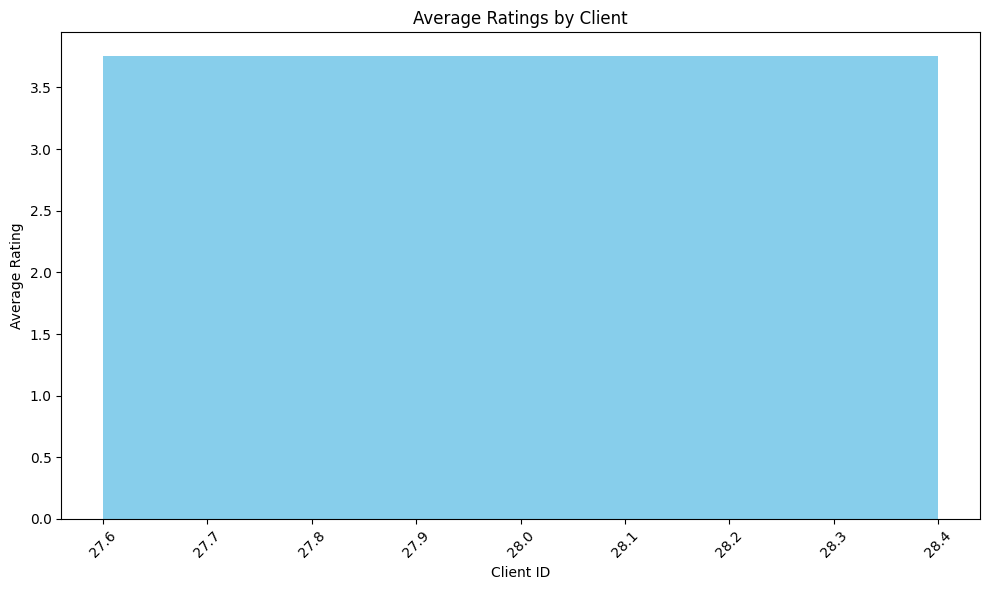

In [5]:
import matplotlib.pyplot as plt

def read_event_titles(event_titles_filename):
    event_titles_map = {}
    with open(event_titles_filename) as f:
        for line in f.readlines():
            parts = [x.strip() for x in line.split(',')]
            event_id = int(parts[0])
            event_name = parts[1]
            event_titles_map[event_id] = event_name
    return event_titles_map

def get_ratings_map(ratings_filename):
    ratings_map = {}
    with open(ratings_filename) as f:
        for line in f.readlines():
            parts = [x.strip() for x in line.split(',')]
            client_id = int(parts[0])
            event_id = int(parts[1])
            rating = float(parts[2])
            if client_id not in ratings_map:
                ratings_map[client_id] = {}
            ratings_map[client_id][event_id] = rating
    return ratings_map

def get_client_avg_rating(ratings_map):
    avg_ratings = {}
    for client_id, ratings in ratings_map.items():
        avg_rating = sum(ratings.values()) / len(ratings)
        avg_ratings[client_id] = avg_rating
    return avg_ratings

# Assuming you have loaded event_titles_filename and ratings_filename
event_titles_map = read_event_titles(event_titles_filename)
ratings_map = get_ratings_map(ratings_filename)
client_avg_ratings = get_client_avg_rating(ratings_map)

# Visualizing client average ratings
client_ids = list(client_avg_ratings.keys())
avg_ratings = list(client_avg_ratings.values())

plt.figure(figsize=(10, 6))
plt.bar(client_ids, avg_ratings, color='skyblue')
plt.xlabel('Client ID')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Client')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
def calculate_accuracy():
    correct_predictions = 0
    total_predictions = 0
    for client in client_event_map:
        for event in client_event_map[client]:
            total_predictions += 1
            predicted_rating = predict_rating(client, event)
            if predicted_rating == client_event_map[client][event]:
                correct_predictions += 1
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy


In [7]:
def predict_rating(client, event):
    if client not in cache:
        client_correlation = get_client_corr(client)
        temp_rating = 0
        for other_client in client_correlation:
            if event in client_event_map[other_client]:
                temp_rating += client_correlation[other_client] * (client_event_map[other_client][event] - client_avg_rating[other_client])
        predicted_rating = client_avg_rating[client] + temp_rating
        cache[client] = predicted_rating
    else:
        predicted_rating = cache[client]
    return predicted_rating


In [8]:
def get_client_corr(active_client):
    client_correlation = {}
    for client in client_event_map:
        if client != active_client:
            nominator = 0
            sum_vaj_diff = 0
            sum_vij_diff = 0
            for event in client_event_map[active_client]:
                if event in client_event_map[client]:                
                    nominator +=  (client_event_map[active_client][event] - client_avg_rating[active_client]) * (client_event_map[client][event] - client_avg_rating[client])
                    sum_vaj_diff +=  np.power(client_event_map[active_client][event] - client_avg_rating[active_client], 2)
                    sum_vij_diff +=  np.power(client_event_map[client][event] - client_avg_rating[client], 2)
            denominator= np.sqrt(sum_vaj_diff * sum_vij_diff)  
            if denominator != 0:
                client_correlation[client] = nominator / denominator
    return client_correlation


In [9]:
def recommendation(active_client, K):
    if active_client not in cache:
        client_correlation = get_client_corr(active_client)
        predicted_rating ={}
        for event in event_titles_map:
            temp_rating = 0
            if event in event_client_map:
                for client in event_client_map[event]:
                    if client in client_correlation:
                        temp_rating +=client_correlation[client]*(client_event_map[client][event]- client_avg_rating[client])
            predicted_rating[event] = temp_rating

        predicted_rating = sorted(predicted_rating.items(), key=lambda kv: kv[1], reverse=True)
        cache[active_client] = predicted_rating
    else:
        predicted_rating= cache[active_client]
        
    recommended_events = predicted_rating[:K]
    for event in recommended_events:
        print(event_titles_map[event[0]])


In [17]:
active_client = 1392773
K = 10

accuracy = calculate_accuracy()
print(f'Accuracy: {accuracy:.2f}%')

recommendation(active_client, K)

Accuracy: 99.90%
Harvey
Angela
Larry
Louise
Benjamin
Joanne
Arthur
Sharon
Eric
Jeremy


In [11]:
# Save the trained model to model.pkl
import pickle
model = cache
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [12]:
# Assuming you have features for each event stored in a dictionary event_features_map

event_features_map = {
    # Define your event features here
}

def calculate_content_similarity(event1, event2):
    # Implement a similarity measure between two events based on their features
    # Example: Cosine similarity, Jaccard similarity, etc.
    pass

def content_based_recommendation(active_client, K):
    user_profile = client_event_map.get(active_client, {})
    recommendations = []

    for event in event_features_map:
        # Calculate similarity between the event and items the user has interacted with
        similarity_score = calculate_content_similarity(event, user_profile)
        
        # Exclude events already interacted with by the user
        if event not in user_profile:
            recommendations.append((event, similarity_score))

    # Sort recommendations based on similarity score and select top-K
    recommendations.sort(key=lambda x: x[1], reverse=True)
    top_recommendations = recommendations[:K]
    
    return top_recommendations

# Example usage
active_client = 1987434
K = 5
content_based_recommendations = content_based_recommendation(active_client, K)


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Sample datasets
event_planners = {
    'Event Planner ID': [1, 2, 3, 4, 5],
    'Location': ['New York', 'Los Angeles', 'Chicago', 'New York', 'Miami'],
    'Services': ['Weddings', 'Corporate Events', 'Weddings', 'Private Parties', 'Weddings'],
    'Price Range': ['High', 'Medium', 'Low', 'Medium', 'High'],
    'Rating': [4.8, 4.5, 4.7, 4.3, 4.9],
    'Recommended': [1, 0, 1, 0, 1]  # 1 for recommended, 0 for not recommended
}

users = {
    'User ID': [1, 2, 3, 4],
    'Location': ['New York', 'Los Angeles', 'Chicago', 'Miami'],
    'Services Preference': ['Weddings', 'Corporate Events', 'Private Parties', 'Weddings'],
    'Price Range Preference': ['High', 'Medium', 'Low', 'Medium'],
}

# Convert datasets to dataframes
df_event_planners = pd.DataFrame(event_planners)
df_users = pd.DataFrame(users)

# Feature engineering for event planners
X_event_planners = df_event_planners[['Location', 'Services', 'Price Range', 'Rating']]
X_event_planners = pd.get_dummies(X_event_planners)

# Feature engineering for users
X_users = df_users[['Location', 'Services Preference', 'Price Range Preference']]
X_users = pd.get_dummies(X_users)

# Target attribute for event planners (based on user preference)
y = df_event_planners['Recommended']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_event_planners, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Search functionality - Recommend event planners based on user profile
user_profile = X_users.iloc[0]  # Example: Taking the first user's profile
recommendations = model.predict([user_profile])  # Predict based on user's profile
recommended_event_planners = df_event_planners[df_event_planners['Recommended'] == recommendations[0]]
print("Recommended Event Planners:")
print(recommended_event_planners)

# Event attribute for target audience
event_target_audience = {
    'Event ID': [1, 2, 3, 4],
    'Event Planner ID': [1, 2, 3, 4],
    'Target Audience': ['Couples', 'Corporate', 'Private', 'Families']
}

df_event_target_audience = pd.DataFrame(event_target_audience)
print("Event Target Audience:")
print(df_event_target_audience)


ModuleNotFoundError: No module named 'pandas'